In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

## Ejercicio 1

In [12]:
def toss_coins(N):
    accumulated_tails = np.zeros(N)
    accumulated_tails[0] = np.random.choice([1, 0])
    for i in range(1, N):
        accumulated_tails[i] = accumulated_tails[i-1] + np.random.choice([1, 0])
    frequency_tails = accumulated_tails / np.arange(1, N + 1)
    return accumulated_tails, frequency_tails

In [13]:
N = np.array([10**2, 10**3, 10**4])
accumulated = []
frequencies = []
# a)
accumulated_tails_100 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6,
                         7, 7, 7, 8, 9, 10, 11, 12, 12, 12,
                         12, 13, 14, 15, 15, 16, 17, 17, 17, 18,
                         19, 20, 21, 22, 22, 23, 24, 24, 25, 26,
                         27, 27, 28, 28, 28, 28, 29, 30, 30, 30,
                         31, 31, 31, 32, 33, 34, 34, 35, 36, 36,
                         37, 37, 38, 38, 39, 40, 41, 41, 42, 43,
                         44, 44, 44, 44, 44, 45, 46, 47, 47, 48,
                         48, 48, 49, 49, 49, 50, 51, 51, 51, 51,
                         51, 51, 52, 52, 52, 52, 53, 54, 55, 56]
accumulated.append(accumulated_tails_100)
frequencies.append(accumulated_tails_100 / np.arange(1, 101))

# b, c)
for n in N[1:]:
    accumulated_tails, frequency_tails = toss_coins(n)
    accumulated.append(accumulated_tails)
    frequencies.append(frequency_tails)

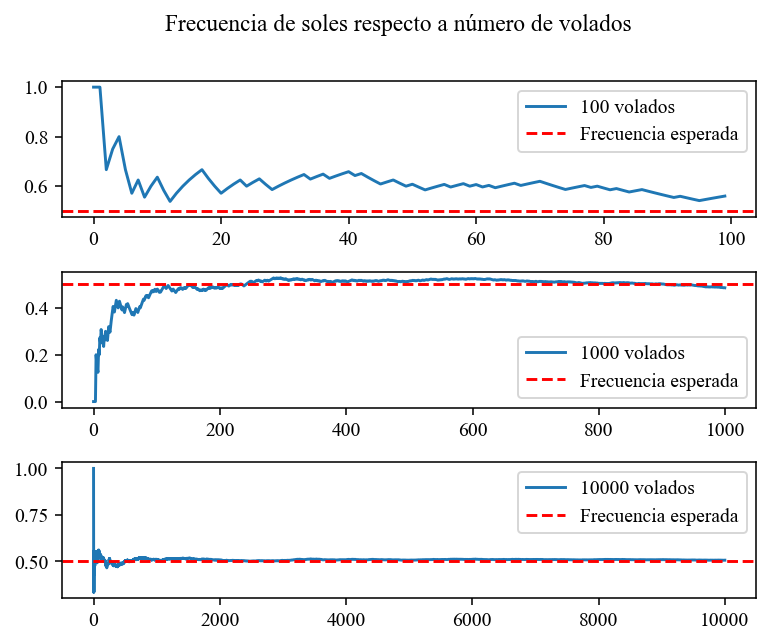

In [14]:
fig, axs = plt.subplot_mosaic([["100"], ["1000"], ["10000"]], dpi=140)
fig.suptitle("Frecuencia de soles respecto a número de volados")

for ax_label, frequency in zip(axs, frequencies):
    axs[ax_label].plot(frequency, label=f"{ax_label} volados", zorder=1)
    axs[ax_label].axhline(1/2, label="Frecuencia esperada", c="r", ls="--", zorder=2)
    axs[ax_label].legend()
    axs[ax_label].set()

plt.subplots_adjust(hspace=0.4)
plt.savefig("Ejercicio1.png")

Observemos que las fluctuaciones respecto a la frecuencia esperada de 1/2 se reducen conforme aumentamos el número de volados. Notando que la frecuencia esperada es el valor esperado de la distribución de volados ($μ$), y que la frecuencia empírica es el promedio de la muestra ($\bar{x}$), podemos explicar este comportamiento observando que
$$\mathrm{var}\{\bar{x}\} = \mathrm{var}\left(\frac{\sum_i^N x_i}{N}\right) = \frac{\sum_i^N \mathrm{var}\left(x_i\right)}{N²} = N\frac{ \mathrm{var}\left(x_i\right)}{N²} = \frac{\mathrm{var}\left(x_i\right)}{N}.$$

Así, vemos que la desviación del promedio respecto al valor esperado tiende a 0 conforme $N$ aumenta.

## Ejercicio 4

In [29]:
# a)
n_steps = 10**4
n_walks = 10**3
# Array para las caminatas
# La i-ésima fila corresponde a la posición de todas las caminatas en
# el paso i. Mientras que la j-ésima columna corresponde a la caminata
# j completa.
walks = np.zeros((n_steps, n_walks))

for step in range(1, n_steps):
    walks[step] = random.choices([1, 0, -1], weights=[1/3, 1/3, 1/3], k=n_walks) + walks[step - 1]

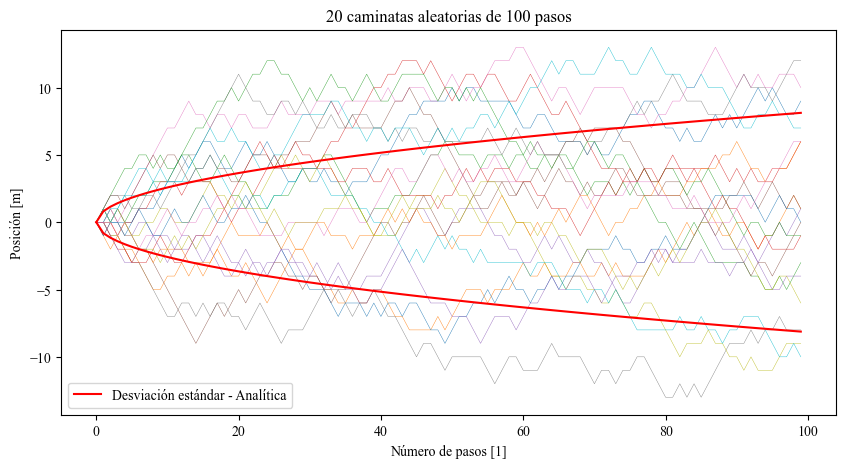

In [28]:
n_walks_plot = 20
steps = np.arange(0, n_steps)
std_analytic = np.sqrt(2/3 * steps)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(walks[:, 0:n_walks_plot], lw=0.3)
ax.plot(steps, std_analytic, color='r', label="Desviación estándar - Analítica")
ax.plot(steps, -std_analytic, color='r')
ax.set(title=f"{n_walks_plot} caminatas aleatorias de {n_steps} pasos",
       xlabel="Número de pasos [1]", ylabel="Posición [m]")

ax.legend()
plt.savefig("Ejercicio4a.png")

b) En el inciso 3.a) encontramos que la desviación estándar está dada por $σ(n)=\sqrt{2/3 N}$ con N el número de pasos. Las líneas rojas en la gráfica de arriba corresponden a $σ(n)$, $-σ(n)$ y observamos que la mayoría de las caminatas se encuentran dentro de este intervalo; las caminatas tienden a agruparse a una desviación estándar del valor esperado $0$.

In [30]:
# c)
n_members = [5, 100, 500, 1000]
walk_groups = []

for n in n_members:
    walk_groups.append(walks[:, 0:n])

group_averages = []
group_squared_averages = []
for group in walk_groups:
    group_average = np.zeros(n_steps)
    group_squared_average = np.zeros(n_steps)
    for n in range(0, n_steps):
        group_average[n] = group[n, :].mean()
        group_squared_average[n] = (group[n, :]**2).mean()
    group_averages.append(group_average)
    group_squared_averages.append(group_squared_average)

group_variances = np.array(group_squared_averages) - np.array(group_averages)**2

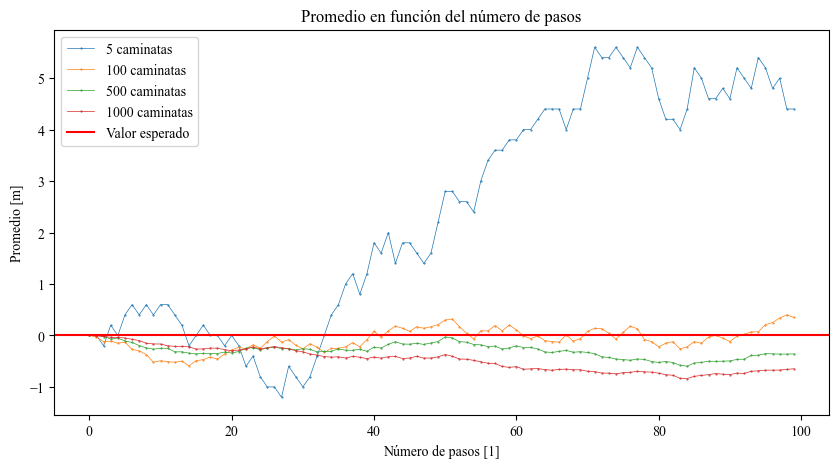

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

for n, average in zip(n_members, group_averages):
    ax.plot(average, lw=0.5, label=f"{n} caminatas", marker='.', markersize=1)

ax.axhline(0, color='r', label="Valor esperado")
ax.set(title=f"Promedio en función del número de pasos",
       xlabel="Número de pasos [1]", ylabel="Promedio [m]")

ax.legend()
plt.savefig("Ejercicio4c.png")

d) El promedio de la muestra sigue, como vimos en el Problema 1, $\mathrm{var}(\bar{S}) = \frac{\mathrm{var}\left(S_i\right)}{M} = \frac{3/2N}{M}$, siendo M el número de caminatas que promediamos y N el número de pasos. Este es el comportamiento que observamos en la gráfica de arriba: para valores bajos de M, el promedio de la muestra se separa rápidamente del valor esperado conforme aumenta el número de pasos, sin embaro, cuando promediamos más caminatas, el promedio se separa más lentamente del valor esperado.

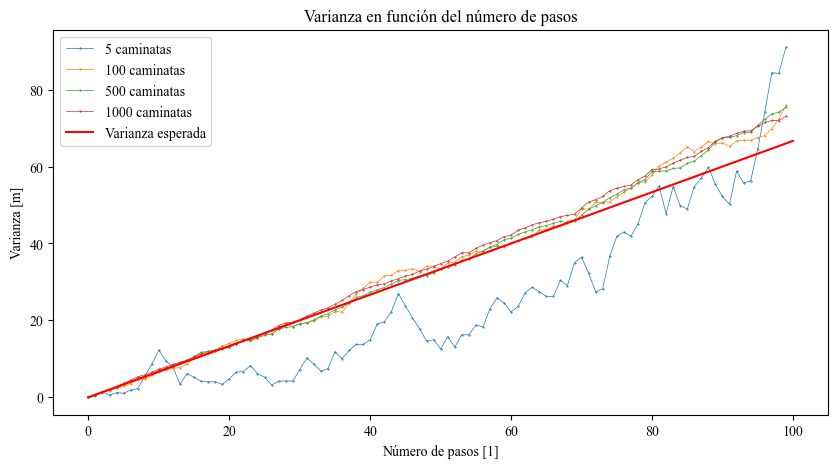

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

for n, average in zip(n_members, group_variances):
    ax.plot(average, lw=0.5, label=f"{n} caminatas", marker='.', markersize=1)

var_X = 2 / 3
ax.plot((0, n_steps), (0, var_X * n_steps), color='r', label="Varianza esperada")
ax.set(title=f"Varianza en función del número de pasos",
       xlabel="Número de pasos [1]", ylabel="Varianza [m]")

ax.legend()
plt.savefig("Ejercicio4d.png")

f) Observamos nuevamente que conforme el número de caminatas utilizadas para calcular la varianza empírica aumenta, la varianza empírica se aleja más lentamente de la varianza esperada.

Cualitativamente, la varianza de la muestra debe de ser una función del número de caminatas M y el número de pasos N: $ς^2 = ς^2(M, N)$. Además, como la varianza de cada caminata aumenta con $N$ (i.e., $σ^2 = 3/2 N$), $ς^2$ también debe de aumentar. Así, para un valor de $M$ fijo, $ς^2$ crece con el número de pasos.